<div style="
  background-color: #432B7A;
  background-image: linear-gradient(to bottom right, #7A288A, #432B7A);
  background-size: 100% 200px;
  background-position: 0% 100%;
  transition: background-position 0.5s ease-in-out;
  color: #F7CAC9;
  font-family: 'Merriweather', serif;
  font-style: italic;
  font-weight: bold;
  font-size: 30px;
  padding: 10px 15px;
  margin: 0px 0 0 0px;
  border-radius: 10px;
  border: none;
  box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
  width: 700px;
  text-align: left;
">
  <h2 style="margin: 0;">Worst Plane Crashes History</h2>
</div>

In [18]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('plane_crash_info.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,Fatal,Date,Location,Carrier,Flight,Type
0,2907*,09/11/2001,"New York City, New York",American /United Airlines,11/93,B767 / B767
1,583,03/27/1977,"Tenerife, Canary Islands",Pan Am / KLM,1736/4805,B747 / B747
2,520,08/12/1985,"Mt. Osutaka, Japan",Japan Air Lines,123,B747
3,349,11/12/1996,"New Delhi, India",Saudi / Kazastan,763/1907,B747 / Il76
4,346,03/03/1974,"Bois d' Ermenonville, France",Turkish Airlines,981,DC10


In [20]:
df.shape

(104, 6)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Fatal     104 non-null    object
 1   Date      104 non-null    object
 2   Location  104 non-null    object
 3   Carrier   104 non-null    object
 4   Flight    104 non-null    object
 5   Type      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [22]:
df.isnull().sum()

Fatal       0
Date        0
Location    0
Carrier     0
Flight      0
Type        0
dtype: int64

In [23]:
df.describe()

,Fatal,Date,Location,Carrier,Flight,Type
count,104,104,104,104,104,104
unique,73,102,97,93,90,45
top,154,09/11/2001,"Tenerife, Canary Islands",Aeroflot,-,B727
freq,4,2,3,4,10,11


<div style="
  background-color: #432B7A;
  background-image: linear-gradient(to bottom right, #7A288A, #432B7A);
  background-size: 100% 200px;
  background-position: 0% 100%;
  transition: background-position 0.5s ease-in-out;
  color: #F7CAC9;
  font-family: 'Merriweather', serif;
  font-style: italic;
  font-weight: bold;
  font-size: 30px;
  padding: 10px 15px;
  margin: 0px 0 0 0px;
  border-radius: 10px;
  border: none;
  box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
  width: 360px;
  text-align: left;
">
  <h2 style="margin: 0;">Trend Analysis</h2>
</div>

### What is the trend of fatal incidents over time based on the date attribute? Are there any noticeable patterns or spikes in certain years or months?

In [24]:
df['Fatal'] = np.where(df['Fatal'] == '2907*', 2907, df['Fatal'])

In [25]:
df['Fatal'] = df['Fatal'].astype(int)

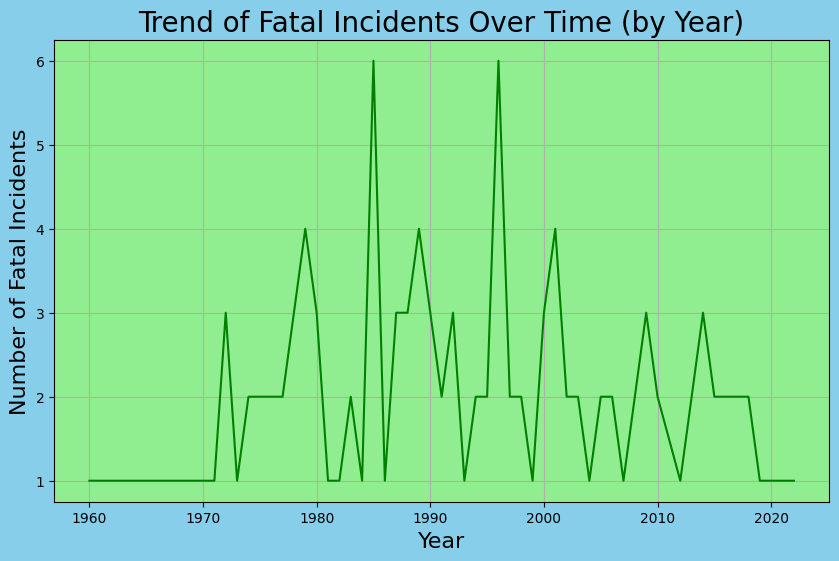

In [26]:
df['Date'] = pd.to_datetime(df['Date'])

fatal_by_year = df.groupby(df['Date'].dt.year).size()

plt.figure(figsize=(10, 6))
fatal_by_year.plot(kind='line', color='green')
plt.title('Trend of Fatal Incidents Over Time (by Year)', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Fatal Incidents', fontsize=16)
plt.grid(True)
plt.gcf().patch.set_facecolor('skyblue')
plt.gca().set_facecolor('lightgreen')
plt.show()

<div style="
  background-color: #432B7A;
  background-image: linear-gradient(to bottom right, #7A288A, #432B7A);
  background-size: 100% 200px;
  background-position: 0% 100%;
  transition: background-position 0.5s ease-in-out;
  color: #F7CAC9;
  font-family: 'Merriweather', serif;
  font-style: italic;
  font-weight: bold;
  font-size: 30px;
  padding: 10px 15px;
  margin: 0px 0 0 0px;
  border-radius: 10px;
  border: none;
  box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
  width: 440px;
  text-align: left;
">
  <h2 style="margin: 0;">Location Analysis</h2>
</div>

###  Which location(s) have had the highest number of fatal incidents? Are there any particular regions or airports that stand out in terms of safety concerns?

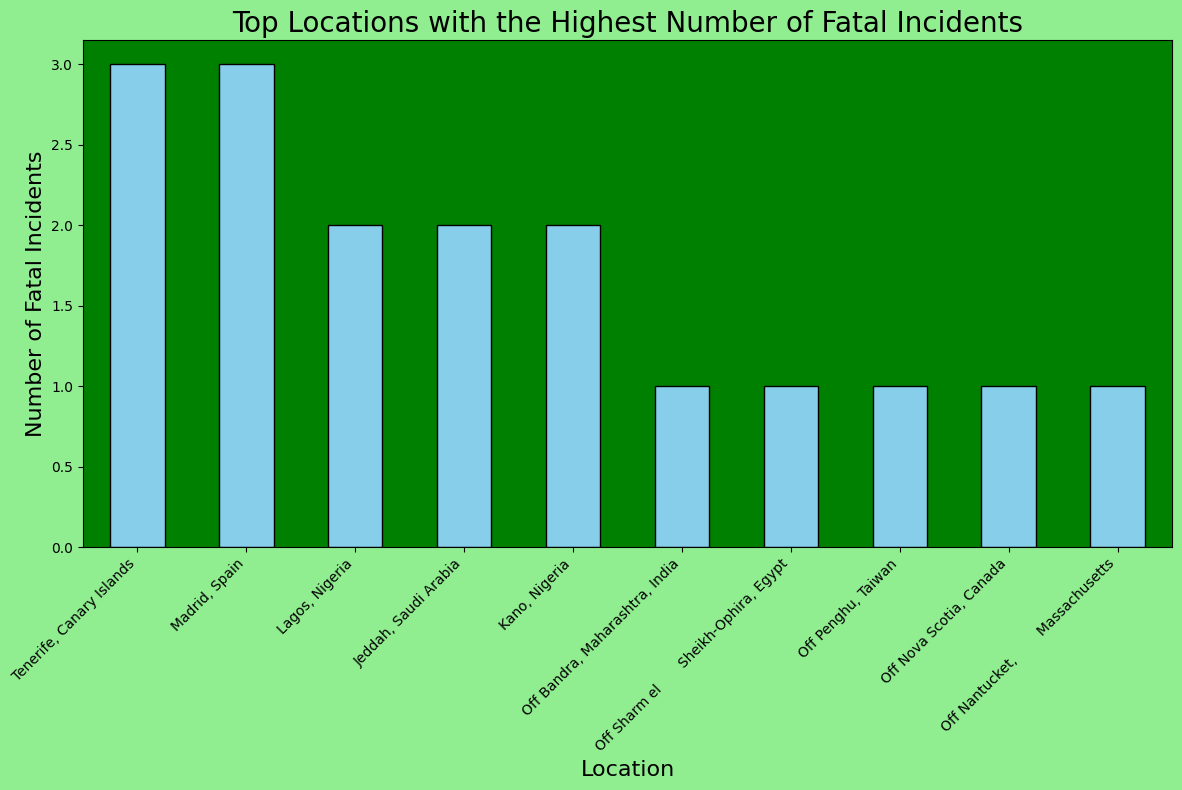

In [27]:
fatal_by_location = df.groupby('Location').size().sort_values(ascending=False)

top_locations = fatal_by_location.head(10)

plt.figure(figsize=(12, 8))
top_locations.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top Locations with the Highest Number of Fatal Incidents', fontsize=20)
plt.xlabel('Location', fontsize=16)
plt.ylabel('Number of Fatal Incidents', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.gcf().patch.set_facecolor('lightgreen')
plt.gca().set_facecolor('green')
plt.show()

<div style="
  background-color: #432B7A;
  background-image: linear-gradient(to bottom right, #7A288A, #432B7A);
  background-size: 100% 200px;
  background-position: 0% 100%;
  transition: background-position 0.5s ease-in-out;
  color: #F7CAC9;
  font-family: 'Merriweather', serif;
  font-style: italic;
  font-weight: bold;
  font-size: 30px;
  padding: 10px 15px;
  margin: 0px 0 0 0px;
  border-radius: 10px;
  border: none;
  box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
  width: 440px;
  text-align: left;
">
  <h2 style="margin: 0;">Carrier Analysis</h2>
</div>

### How do different carriers compare in terms of the number of fatal incidents? Are there any carriers that have a notably higher or lower incidence rate compared to others?

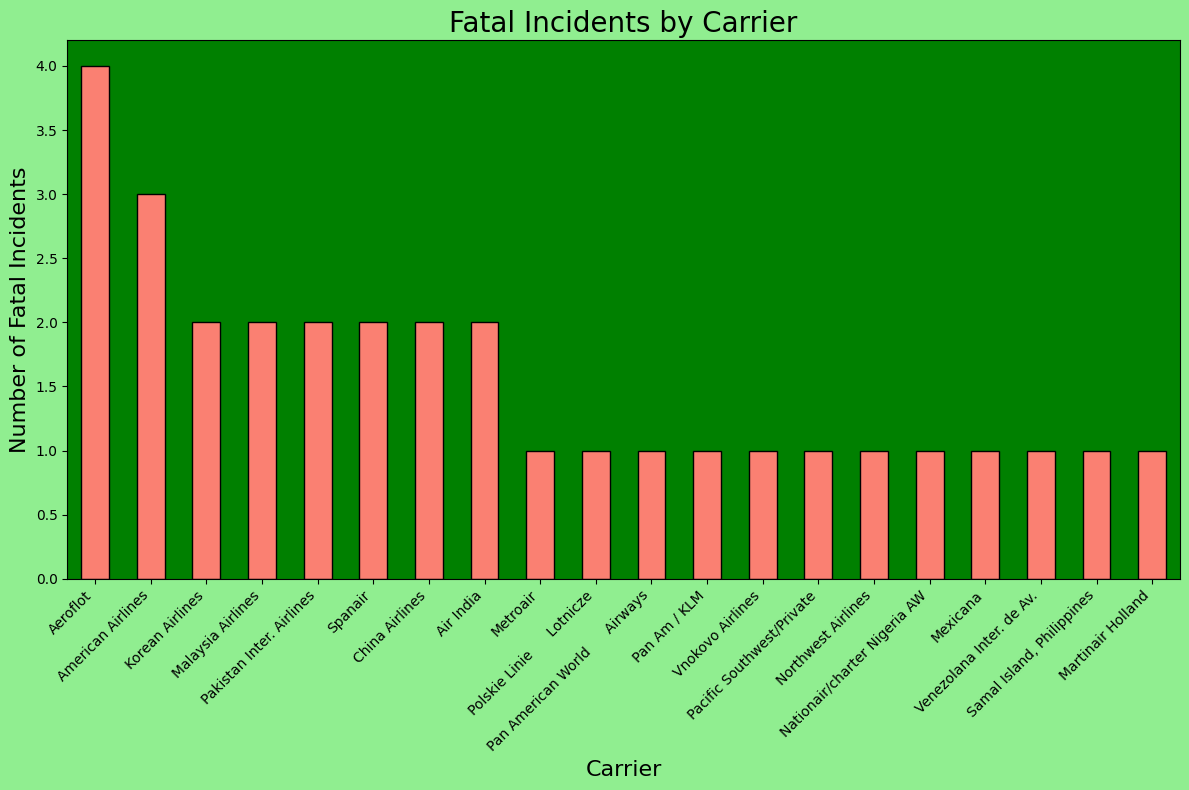

In [28]:
fatal_by_carrier = df.groupby('Carrier').size().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
fatal_by_carrier.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Fatal Incidents by Carrier', fontsize=20)
plt.xlabel('Carrier', fontsize=16)
plt.ylabel('Number of Fatal Incidents', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.gcf().patch.set_facecolor('lightgreen')
plt.gca().set_facecolor('green')
plt.show()

<div style="
  background-color: #432B7A;
  background-image: linear-gradient(to bottom right, #7A288A, #432B7A);
  background-size: 100% 200px;
  background-position: 0% 100%;
  transition: background-position 0.5s ease-in-out;
  color: #F7CAC9;
  font-family: 'Merriweather', serif;
  font-style: italic;
  font-weight: bold;
  font-size: 30px;
  padding: 10px 15px;
  margin: 0px 0 0 0px;
  border-radius: 10px;
  border: none;
  box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
  width: 500px;
  text-align: left;
">
  <h2 style="margin: 0;">Flight Type Analysis</h2>
</div>

### Is there any correlation between the type of flight (e.g., domestic, international) and the likelihood of a fatal incident occurring?

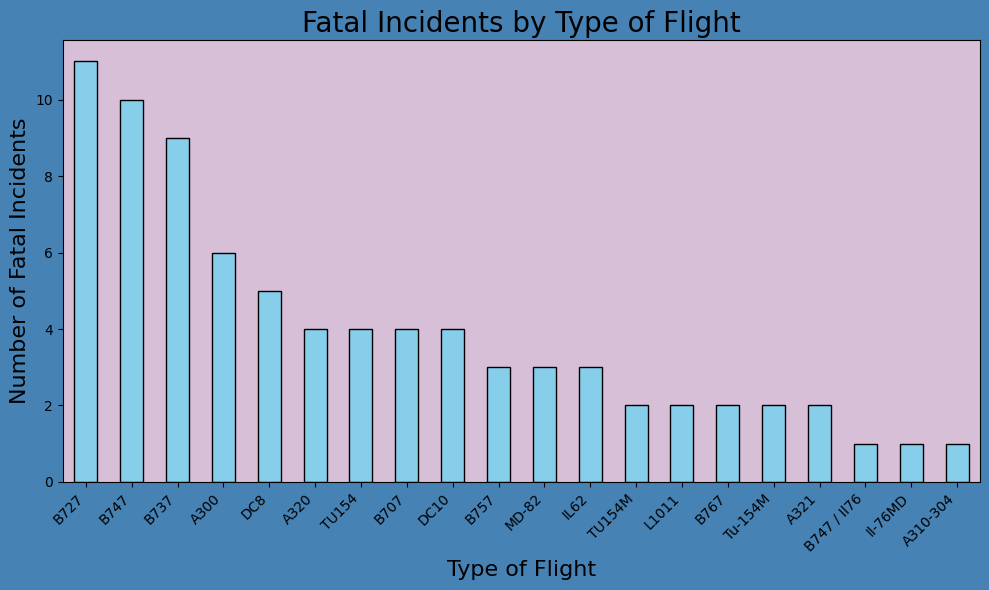

In [29]:
fatal_by_flight_type = df.groupby('Type').size().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
fatal_by_flight_type.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Fatal Incidents by Type of Flight', fontsize=20)
plt.xlabel('Type of Flight', fontsize=16)
plt.ylabel('Number of Fatal Incidents', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.gcf().patch.set_facecolor('steelblue')
plt.gca().set_facecolor('thistle')
plt.show()

<div style="
  background-color: #432B7A;
  background-image: linear-gradient(to bottom right, #7A288A, #432B7A);
  background-size: 100% 200px;
  background-position: 0% 100%;
  transition: background-position 0.5s ease-in-out;
  color: #F7CAC9;
  font-family: 'Merriweather', serif;
  font-style: italic;
  font-weight: bold;
  font-size: 30px;
  padding: 10px 15px;
  margin: 0px 0 0 0px;
  border-radius: 10px;
  border: none;
  box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
  width: 650px;
  text-align: left;
">
  <h2 style="margin: 0;">AirCraft Type Comparison</h2>
</div>

### Are certain types of aircraft more prone to fatal incidents compared to others? Is there any correlation between the type of aircraft and the severity of incidents?

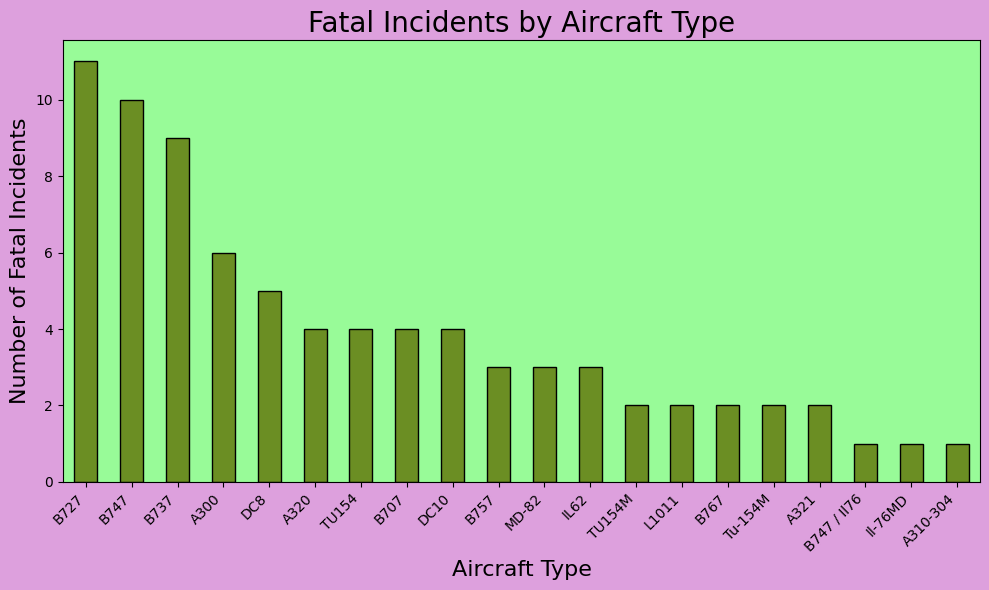

In [30]:
fatal_by_aircraft_type = df.groupby('Type').size().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
fatal_by_aircraft_type.plot(kind='bar', color='olivedrab', edgecolor='black')
plt.title('Fatal Incidents by Aircraft Type', fontsize=20)
plt.xlabel('Aircraft Type', fontsize=16)
plt.ylabel('Number of Fatal Incidents',fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.gcf().patch.set_facecolor('plum')
plt.gca().set_facecolor('palegreen')
plt.show()

<div style="
  background-color: #432B7A;
  background-image: linear-gradient(to bottom right, #7A288A, #432B7A);
  background-size: 100% 200px;
  background-position: 0% 100%;
  transition: background-position 0.5s ease-in-out;
  color: #F7CAC9;
  font-family: 'Merriweather', serif;
  font-style: italic;
  font-weight: bold;
  font-size: 30px;
  padding: 10px 15px;
  margin: 0px 0 0 0px;
  border-radius: 10px;
  border: none;
  box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
  width: 450px;
  text-align: left;
">
  <h2 style="margin: 0;">Temporal Analysis</h2>
</div>

### Are there any seasonal or time-related patterns in fatal incidents? For instance, do certain months or times of the day have a higher likelihood of accidents?

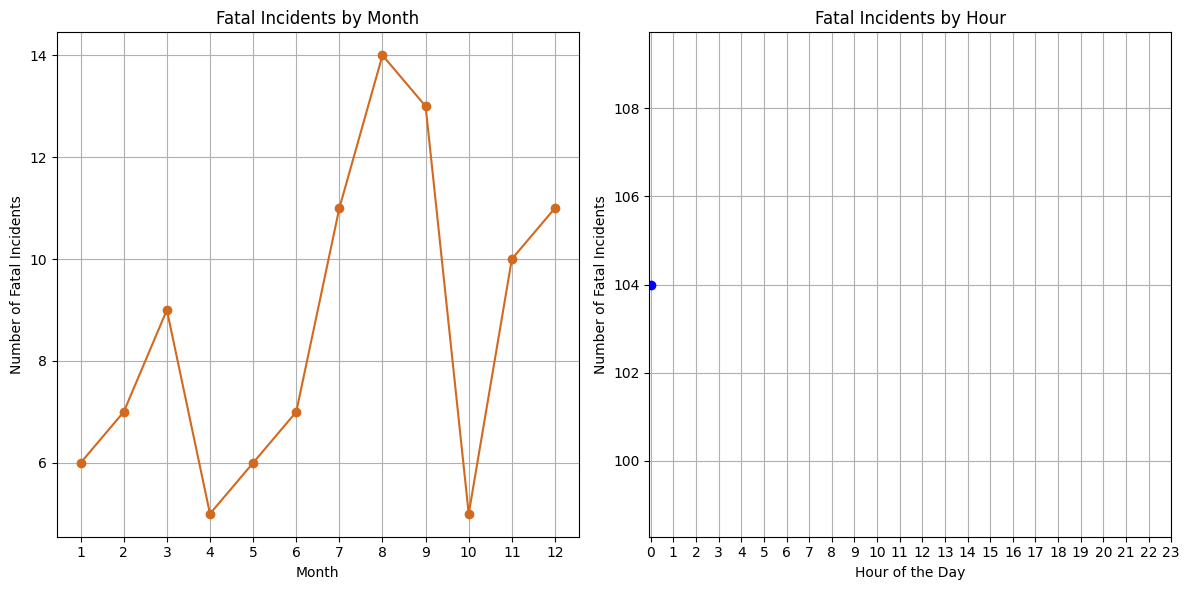

In [31]:
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month
df['Hour'] = df['Date'].dt.hour

fatal_by_month = df.groupby('Month').size()

fatal_by_hour = df.groupby('Hour').size()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
fatal_by_month.plot(kind='line', marker='o', color='chocolate')
plt.title('Fatal Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Fatal Incidents')
plt.xticks(range(1, 13))
plt.grid(True)

plt.subplot(1, 2, 2)
fatal_by_hour.plot(kind='line', marker='o', color='blue')
plt.title('Fatal Incidents by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Fatal Incidents')
plt.xticks(range(24))
plt.grid(True)

plt.tight_layout()
plt.show()

<div style="
  background-color: #432B7A;
  background-image: linear-gradient(to bottom right, #7A288A, #432B7A);
  background-size: 100% 200px;
  background-position: 0% 100%;
  transition: background-position 0.5s ease-in-out;
  color: #F7CAC9;
  font-family: 'Merriweather', serif;
  font-style: italic;
  font-weight: bold;
  font-size: 30px;
  padding: 10px 15px;
  margin: 0px 0 0 0px;
  border-radius: 10px;
  border: none;
  box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
  width: 500px;
  text-align: left;
">
  <h2 style="margin: 0;">Root Cause Analysis</h2>
</div>

### Can we identify any common factors or root causes that contribute to fatal incidents across different cases? This could include factors such as weather conditions, mechanical failures, human error, etc.

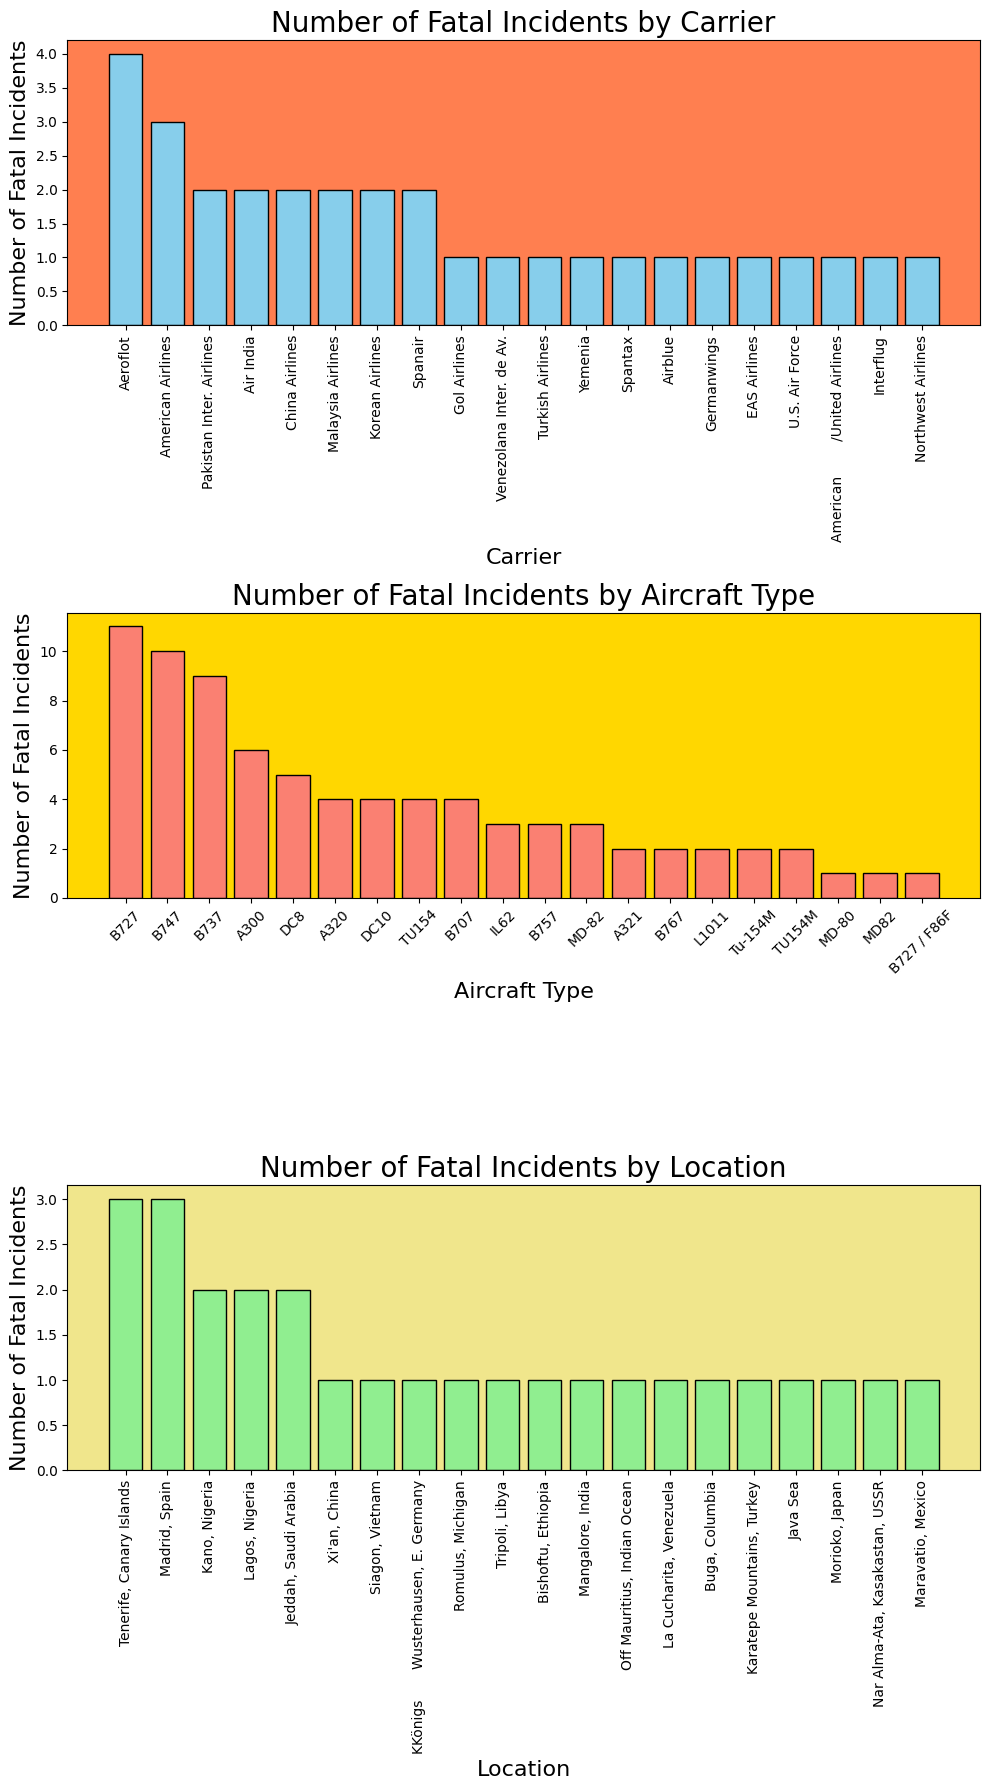

In [32]:
carrier_counts = df['Carrier'].value_counts().head(20)
aircraft_counts = df['Type'].value_counts().head(20)
locations_counts = df['Location'].value_counts().head(20)

fig, axs = plt.subplots(3, 1, figsize=(10, 18))

axs[0].bar(carrier_counts.index, carrier_counts.values, color='skyblue', edgecolor='black')
axs[0].set_title('Number of Fatal Incidents by Carrier', fontsize=20)
axs[0].set_xlabel('Carrier', fontsize=16)
axs[0].set_ylabel('Number of Fatal Incidents', fontsize=16)
axs[0].tick_params(axis='x', rotation=90)
axs[0].patch.set_facecolor('coral')

axs[1].bar(aircraft_counts.index, aircraft_counts.values, color='salmon', edgecolor='black')
axs[1].set_title('Number of Fatal Incidents by Aircraft Type', fontsize=20)
axs[1].set_xlabel('Aircraft Type', fontsize=16)
axs[1].set_ylabel('Number of Fatal Incidents', fontsize=16)
axs[1].tick_params(axis='x', rotation=45)
axs[1].patch.set_facecolor('gold')

axs[2].bar(locations_counts.index, locations_counts.values, color='lightgreen', edgecolor='black')
axs[2].set_title('Number of Fatal Incidents by Location', fontsize=20)
axs[2].set_xlabel('Location', fontsize=16)
axs[2].set_ylabel('Number of Fatal Incidents', fontsize=16)
axs[2].tick_params(axis='x', rotation=90)
axs[2].patch.set_facecolor('khaki')

plt.tight_layout()
plt.show()